In [ ]:
##Steps to be completed
#Importing DataBase
#Unzip the folder and get ready with train and test Data
#Study the dataset and make the data ready for the Model(Data Preprocessing)
#Image Scalling
#Importing the VGG16 Model, and make it ready to fit the data
#Fit the model in our Dataset and analyse its performance
#Get the accuracy and compare the training accuracy and Validation accuracy
#fit the model in test data and see the performance
#Get a new image and predict the disease
#Save the model
#Make a UI and make ready for the user(Needed Flask)


In [ ]:
!ls

## UnZip the train and test data

In [ ]:
from zipfile import ZipFile

with ZipFile('train.zip','r') as zip:
  zip.extractall()
print("Train Dataset extracted")

Train Dataset extracted


In [ ]:
from zipfile import ZipFile

with ZipFile('test.zip','r') as zip:
  zip.extractall()
print("Test Dataset extracted")

Test Dataset extracted


In [ ]:
#Counting number of images on train data and watching the number of classes
import os
file_count_train = 0
for path, dir, files in os.walk('/content/train'):
  file_count_train+=len(files)
  print(path)
print("Number of images in train:",file_count_train)

/content/train
/content/train/red lunula
/content/train/half and half nailes (Lindsay_s nails)
/content/train/onycholycis
/content/train/eczema
/content/train/beau_s lines
/content/train/bluish nail
/content/train/pale nail
/content/train/yellow nails
/content/train/Darier_s disease
/content/train/terry_s nail
/content/train/clubbing
/content/train/Muehrck-e_s lines
/content/train/aloperia areata
/content/train/koilonychia
/content/train/leukonychia
/content/train/splinter hemmorrage
/content/train/white nail
Number of images in train: 655


In [ ]:
#Counting number of images on test data and watching the number of classes
import os
file_count_test =0
for path, dir, files in os.walk('/content/test'):
  file_count_test+=len(files)
  print(path)
print("Number of images in test:",file_count_test)

/content/test
/content/test/red lunula
/content/test/half and half nailes (Lindsay_s nails)
/content/test/onycholycis
/content/test/eczema
/content/test/beau_s lines
/content/test/bluish nail
/content/test/pale nail
/content/test/yellow nails
/content/test/Darier_s disease
/content/test/terry_s nail
/content/test/clubbing
/content/test/Muehrck-e_s lines
/content/test/aloperia areata
/content/test/koilonychia
/content/test/leukonychia
/content/test/splinter hemmorrage
/content/test/white nail
Number of images in test: 183


## There are 655 images in train and 183 in test Data

## Checking the dimensions of the image

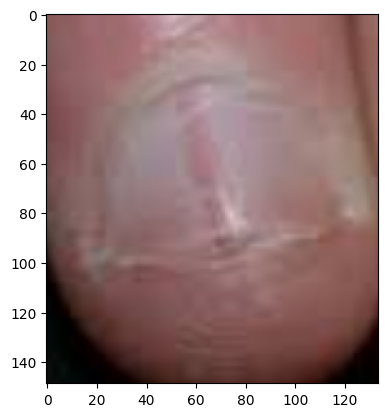

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('/content/train/Darier_s disease/1.PNG')
imgplot = plt.imshow(img)
imgplot

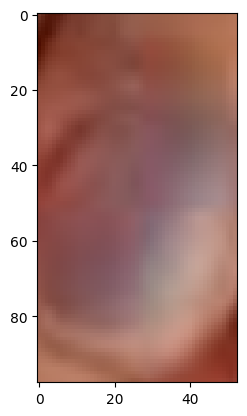

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('/content/test/bluish nail/12.PNG')
imgplot = plt.imshow(img)
imgplot

## We have to resize the image to 224*224

In [ ]:
import os
os.makedirs("train.resize", exist_ok=True)
print("Train resized folder made")

Train resized folder made


In [ ]:
import os
os.makedirs("test.resize", exist_ok=True)
print("Train resized folder made")

Train resized folder made


In [ ]:
from PIL import Image
import os

original_folder = '/content/train'
resized_folder = '/content/train.resize'

for path, dir, files in os.walk(original_folder):
  for folder in dir:
    # Create the corresponding folder in resized_folder
    os.makedirs(resized_folder + '/' + folder, exist_ok=True)

    ImageFiles = os.listdir(original_folder + '/' + folder)

    for image in ImageFiles:
      image_path = original_folder + '/' + folder + '/' + image

      try:
        img = Image.open(image_path)
        img = img.resize((224, 224))
        img = img.convert("RGB")

        # Save to the correct file path
        save_path = resized_folder + '/' + folder + '/' + image
        img.save(save_path)

      except Exception as e:
        print(f"Skipped {image_path}: {e}")
print('Training Data resized Completed')


Training Data resized Completed


In [ ]:
from PIL import Image
import os

original_folder = '/content/test'
resized_folder = '/content/test.resize'

for path, dir, files in os.walk(original_folder):
  for folder in dir:
    # Create the corresponding folder in resized_folder
    os.makedirs(resized_folder + '/' + folder, exist_ok=True)

    ImageFiles = os.listdir(original_folder + '/' + folder)

    for image in ImageFiles:
      image_path = original_folder + '/' + folder + '/' + image

      try:
        img = Image.open(image_path)
        img = img.resize((224, 224))
        img = img.convert("RGB")

        # Save to the correct file path
        save_path = resized_folder + '/' + folder + '/' + image
        img.save(save_path)

      except Exception as e:
        print(f"Skipped {image_path}: {e}")
print("Test Data resized completed")

Test Data resized completed


## Checking dimensions in train.resize


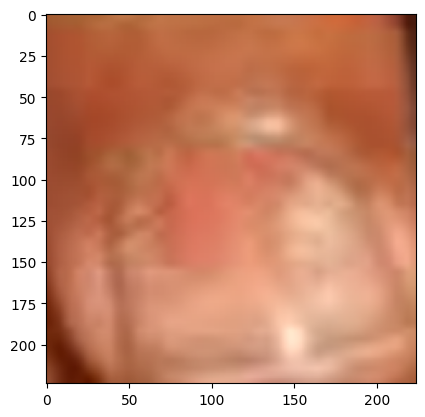

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('/content/train.resize/aloperia areata/10.PNG')
imgplot = plt.imshow(img)
imgplot

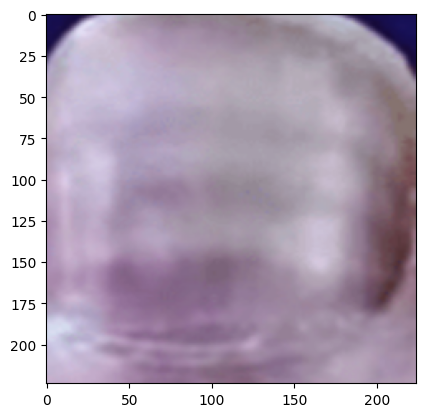

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('/content/test.resize/Muehrck-e_s lines/1.PNG')
imgplot = plt.imshow(img)
imgplot

In [ ]:
#Counting number of images on train_resized data
import os
file_count_train_reseized = 0
for path, dir, files in os.walk('/content/train.resize'):
  file_count_train_reseized+=len(files)
  # print(path)
print("Number of images in train resized:",file_count_train_reseized)

Number of images in train resized: 655


In [ ]:
#Counting number of images on test_resized data
import os
file_count_test_reseized = 0
for path, dir, files in os.walk('/content/test.resize'):
  file_count_test_reseized+=len(files)
  # print(path)
print("Number of images in train resized:",file_count_test_reseized)

Number of images in train resized: 183


## All the images of test and train are resized

## Pre processing the data and creating labels

In [ ]:
# from PIL import Image
# import numpy as np
# import os
# from sklearn.utils import shuffle
# from tensorflow.keras.applications.vgg16 import preprocess_input

# ResizedFolderPath = '/content/train.resize'
# Train_subfolders = sorted(os.listdir(ResizedFolderPath))

# Labels_map = {folder: idx for idx, folder in enumerate(Train_subfolders)}
# print("Label map:", Labels_map)

# X_train = []
# y_train = []

# for folder in Train_subfolders:
#     folderPath = os.path.join(ResizedFolderPath, folder)
#     for image_name in os.listdir(folderPath):
#         image_path = os.path.join(folderPath, image_name)
#         if image_name.lower().endswith(('.png', '.jpg', '.jpeg')):
#             try:
#                 img = Image.open(image_path).resize((224, 224)).convert('RGB')
#                 img_array = np.array(img)
#                 img_array = preprocess_input(img_array)
#                 X_train.append(img_array)
#                 y_train.append(Labels_map[folder])
#             except Exception as e:
#                 print(f"Skipped {image_path}: {e}")

# X_train = np.array(X_train)
# y_train = np.array(y_train)


# X_train, y_train = shuffle(X_train, y_train, random_state=42)

# print("X_train shape:", X_train.shape)
# print("y_train shape:", y_train.shape)


In [ ]:
# from PIL import Image
# import numpy as np
# import os
# from sklearn.utils import shuffle
# from tensorflow.keras.applications.vgg16 import preprocess_input

# ResizedFolderPath = '/content/test.resize'
# Test_subfolders = sorted(os.listdir(ResizedFolderPath))

# Labels_map = {folder: idx for idx, folder in enumerate(Test_subfolders)}
# print("Label map:", Labels_map)

# X_test = []
# y_test = []

# for folder in Test_subfolders:
#     folderPath = os.path.join(ResizedFolderPath, folder)
#     for image_name in os.listdir(folderPath):
#         image_path = os.path.join(folderPath, image_name)
#         if image_name.lower().endswith(('.png', '.jpg', '.jpeg')):
#             try:
#                 img = Image.open(image_path).resize((224, 224)).convert('RGB')
#                 img_array = np.array(img)
#                 img_array = preprocess_input(img_array)
#                 X_test.append(img_array)
#                 y_test.append(Labels_map[folder])
#             except Exception as e:
#                 print(f"Skipped {image_path}: {e}")

# X_test = np.array(X_test)
# y_test = np.array(y_test)

# # Shuffle data
# X_test, y_test = shuffle(X_test, y_test, random_state=42)

# print("X_test shape:", X_test.shape)
# print("y_test shape:", y_test.shape)


#Importing the VGG16 Model, and make it ready to fit the data

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16,preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten,Input
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras import regularizers


# base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
vgg = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in vgg.layers:
    layer.trainable = False

x = Flatten()(vgg.output)
# x = Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001))(x)
# x = Dropout(0.5)(x)
predictions = Dense(17, activation='softmax')(x)

model = Model(inputs=vgg.input, outputs=predictions)



model.summary()



58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 17)             │       426,513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,141,201 (57.76 MB)

 Trainable params: 426,513 (1.63 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'], run_eagerly=True)
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)


train_set = train_datagen.flow_from_directory('/content/train.resize',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')
test_set = test_datagen.flow_from_directory('/content/test.resize',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')
train_set.class_indices

Found 655 images belonging to 17 classes.
Found 183 images belonging to 17 classes.


{'Darier_s disease': 0,
 'Muehrck-e_s lines': 1,
 'aloperia areata': 2,
 'beau_s lines': 3,
 'bluish nail': 4,
 'clubbing': 5,
 'eczema': 6,
 'half and half nailes (Lindsay_s nails)': 7,
 'koilonychia': 8,
 'leukonychia': 9,
 'onycholycis': 10,
 'pale nail': 11,
 'red lunula': 12,
 'splinter hemmorrage': 13,
 'terry_s nail': 14,
 'white nail': 15,
 'yellow nails': 16}

#Fit the model in our Dataset and analyse its performance

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
# from sklearn.utils import class_weight

early_stop = EarlyStopping(
    monitor='val_accuracy',
    mode= 'max',
    patience=3,
    restore_best_weights=True
)

history =model.fit(train_set,validation_data=test_set, epochs=30, steps_per_epoch = len(train_set)//3, validation_steps = len(test_set)//3)
# Get final epoch's training and validation accuracy
train_acc = history.history['accuracy'][-1]
val_acc = history.history['val_accuracy'][-1]

# Print formatted values without scientific notation
print("Training Accuracy: {:.4f}".format(train_acc))
print("Validation Accuracy: {:.4f}".format(val_acc))


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 514s 74s/step - accuracy: 0.0427 - loss: 3.6920 - val_accuracy: 0.1250 - val_loss: 3.2505
Epoch 2/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 483s 69s/step - accuracy: 0.1281 - loss: 3.2260 - val_accuracy: 0.1406 - val_loss: 3.2703
Epoch 3/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 563s 83s/step - accuracy: 0.1914 - loss: 2.9822 - val_accuracy: 0.2344 - val_loss: 2.4713
Epoch 4/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 561s 82s/step - accuracy: 0.2774 - loss: 2.4375 - val_accuracy: 0.3750 - val_loss: 2.1806
Epoch 5/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 502s 73s/step - accuracy: 0.3331 - loss: 2.2721 - val_accuracy: 0.2656 - val_loss: 2.3499
Epoch 6/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 512s 74s/step - accuracy: 0.3456 - loss: 2.1620 - val_accuracy: 0.3438 - val_loss: 1.9644
Epoch 7/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 562s 82s/step - accuracy: 0.3199 - loss: 2.3108 - val_accuracy: 0.3438 - val_loss: 1.9571
Epoch 8/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 562s 83s/step - accuracy: 0.4676 - loss: 1.8026 - val_accuracy: 0.5000 - val_loss:

In [ ]:
# score, acc = model.evaluate(X_test, y_test)
# print('Test Loss = ',score)
# print('Test Accuracy = ',acc)

In [ ]:
ResizedFolderPath = '/content/train.resize'
Train_subfolders = sorted(os.listdir(ResizedFolderPath))

Labels_map = {folder: idx for idx, folder in enumerate(Train_subfolders)}
img_path = input("Enter the path of the image:")
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
labels=['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17']
img = load_img(img_path, target_size=(224, 224))
x = img_to_array(img)
x = preprocess_input(x)
preds = model.predict(np.array([x]))
cond= False
predicted_label = labels[np.argmax(preds)]
for key,value in Labels_map.items():
  if value== int(predicted_label):
    print("The Disease is:",key)
    cond=True
if(cond==False):
  print("Congratulations!No Disease Detected")

Enter the path of the image:/content/train.resize/Darier_s disease/10.PNG
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 607ms/step
The Disease is: onycholycis


In [ ]:
model.save("DiseaseDetection.h5")

## Building UI and forming a Flask App

In [ ]:
!pip install flask pyngrok --quiet

In [ ]:
# Step 2: Your imports and setup
from flask import Flask, request
from werkzeug.utils import secure_filename

import os
import numpy as np
from PIL import Image
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.vgg16 import preprocess_input

# Step 3: Configurations
UPLOAD_FOLDER = '/tmp/uploads'
ALLOWED_EXTENSIONS = {'png', 'jpg', 'jpeg'}
os.makedirs(UPLOAD_FOLDER, exist_ok=True)

# Load model (make sure the file is uploaded to /content/)
# Note: Ensure your model file "/content/DiseaseDetection.h5" exists.
# If not, you will need to save the trained model first.
try:
    model = load_model("/content/DiseaseDetection.h5")
except Exception as e:
    print(f"Error loading model: {e}")
    # Handle the error, e.g., exit or load a dummy model
    # For demonstration, we'll print the error and continue, but in a real app,
    # you'd want to handle this more robustly.

# Define your label map based on the unique labels in your training data
# This needs to match the Labels_map created when preparing the training data.
# You defined it earlier as:
# Labels_map = {folder: idx for idx, folder in enumerate(Train_subfolders)}
# You should use the same mapping here. For example
Labels_map = {'Darier_s disease': 0, 'Muehrck-e_s lines': 1, 'aloperia areata': 2, 'beau_s lines': 3, 'bluish nail': 4, 'clubbing': 5, 'eczema': 6, 'half and half nailes (Lindsay_s nails)': 7, 'koilonychia': 8, 'leukonychia': 9, 'onycholycis': 10, 'pale nail': 11, 'red lunula': 12, 'splinter hemmorrage': 13, 'terry_s nail': 14, 'white nail': 15, 'yellow nails': 16}
reverse_labels_map = {v: k for k, v in Labels_map.items()}
num_classes = len(reverse_labels_map)

# Create Flask app
app = Flask(__name__)
app.config['UPLOAD_FOLDER'] = UPLOAD_FOLDER

def allowed_file(filename):
    return '.' in filename and filename.rsplit('.', 1)[1].lower() in ALLOWED_EXTENSIONS

# Step 4: Define routes
@app.route('/')
def index():
    return '''
<!DOCTYPE html>
<html lang="en">
<head>
  <meta charset="UTF-8">
  <title>Disease Detection Upload</title>
  <style>
    body {
      background: linear-gradient(to right, #2c3e50, #3498db);
      font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
      color: #fff;
      text-align: center;
      padding: 50px;
    }
    .container {
      background-color: rgba(255, 255, 255, 0.1);
      border-radius: 15px;
      padding: 40px;
      max-width: 500px;
      margin: auto;
      box-shadow: 0 8px 30px rgba(0, 0, 0, 0.3);
    }
    h1 {
      font-size: 2.5em;
      margin-bottom: 20px;
      color: #f1c40f;
    }
    input[type="file"] {
      display: block;
      margin: 20px auto;
      padding: 10px;
      font-size: 1.1em;
      border-radius: 10px;
      background-color: #fff;
      color: #000;
      cursor: pointer;
      border: none;
    }
    input[type="submit"] {
      background-color: #27ae60;
      color: white;
      padding: 12px 25px;
      font-size: 1.1em;
      border: none;
      border-radius: 10px;
      cursor: pointer;
      transition: 0.3s;
    }
    input[type="submit"]:hover {
      background-color: #2ecc71;
      transform: scale(1.05);
    }
  </style>
</head>
<body>
  <div class="container">
    <h1>🌿 Upload an Image to Detect Disease 🌿</h1>
    <form method="POST" enctype="multipart/form-data">
      <input type="file" name="file" required>
      <input type="submit" value="Upload & Predict">
    </form>
  </div>
</body>
</html>
'''


@app.route('/', methods=['POST'])
def upload_and_predict():
    file = request.files['file']
    if file and allowed_file(file.filename):
        filename = secure_filename(file.filename)
        filepath = os.path.join(app.config['UPLOAD_FOLDER'], filename)
        file.save(filepath)

        try:
            img = Image.open(filepath).resize((224, 224)).convert('RGB')
            x = np.array(img)
            x = preprocess_input(x)
            x = np.expand_dims(x, axis=0)

            # Ensure the model was loaded successfully before predicting
            if 'model' in globals() and model is not None:
                preds = model.predict(x)
                print(preds)
                predicted_class_index = np.argmax(preds[0])
                predicted_label = reverse_labels_map.get(predicted_class_index, "Unknown")
                message = f"The Detected Condition is: {predicted_label}"
            else:
                message = "Error: Model not loaded."

        except Exception as e:
            message = f"Error during prediction: {str(e)}"
        finally:
            # Ensure filepath exists before trying to remove it
            if os.path.exists(filepath):
                os.remove(filepath)

            return f'''
<!DOCTYPE html>
<html lang="en">
<head>
  <meta charset="UTF-8">
  <title>Prediction Result</title>
  <style>
    body {{
      margin: 0;
      padding: 0;
      font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
      background: linear-gradient(135deg, #1abc9c, #2c3e50);
      color: #fff;
      text-align: center;
      height: 100vh;
      display: flex;
      justify-content: center;
      align-items: center;
    }}
    .result-box {{
      background: rgba(255, 255, 255, 0.1);
      border-radius: 15px;
      padding: 50px;
      box-shadow: 0 10px 40px rgba(0, 0, 0, 0.4);
      max-width: 600px;
    }}
    h1 {{
      font-size: 2.8em;
      margin-bottom: 20px;
      color: #f1c40f;
      text-shadow: 2px 2px 10px rgba(0,0,0,0.5);
    }}
    p {{
      font-size: 1.5em;
      margin-bottom: 30px;
    }}
    a {{
      display: inline-block;
      padding: 12px 25px;
      font-size: 1.2em;
      background-color: #e74c3c;
      color: white;
      text-decoration: none;
      border-radius: 10px;
      transition: background-color 0.3s, transform 0.2s;
    }}
    a:hover {{
      background-color: #c0392b;
      transform: scale(1.05);
    }}
  </style>
</head>
<body>
  <div class="result-box">
    <h1>🌟 Prediction Result 🌟</h1>
    <p>{message}</p>
    <a href="/">🔁 Upload Another Image</a>
  </div>
</body>
</html>
'''

    return 'Invalid file or file type'

# Step 5: Launch app using pyngrok
# Replace this string with your actual token
# authtoken = "YOUR_NGROK_AUTH_TOKEN" # <-- Replace with your token
# conf.get_default().auth_token = authtoken

# It seems you've already set the token in a previous cell,
# so you might not need this line again if you run the cells sequentially.

# Ensure you've set your ngrok auth token before this step.
# You can do this by running !ngrok config add-authtoken YOUR_NGROK_AUTH_TOKEN
# or programmatically as you did in the previous cell.


In [ ]:
from pyngrok import ngrok
ngrok.kill()
from pyngrok import conf, ngrok

# Replace this string with your actual token
authtoken = "2yjEDO1RftnMZzEjXERIzKMLeQD_PiAVV7jJGG5hHACyKrSD"

# Set authtoken
conf.get_default().auth_token = authtoken
# Start a new ngrok tunnel
try:
    public_url = ngrok.connect(5000)
    print(f"Your app is live at: {public_url}")
    app.run(port=5000, use_reloader=False) # use_reloader=False to avoid running the app twice
except Exception as e:
    print(f"Error starting ngrok or Flask app: {e}")

Your app is live at: NgrokTunnel: "https://f664-35-196-24-194.ngrok-free.app" -> "http://localhost:5000"
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
